## Example how to use SIFT detector and descriptor

In [1]:
import use_sift
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

### Load and initialize SIFT model

In [3]:
model = cv2.xfeatures2d.SIFT_create()

#### Load images

In [8]:
image_paths = [
    '../data/v_churchill/1.ppm',
    '../data/v_churchill/4.ppm'
]

In [5]:
img1 = cv2.imread(image_paths[0], 0)
img2 = cv2.imread(image_paths[1], 0)

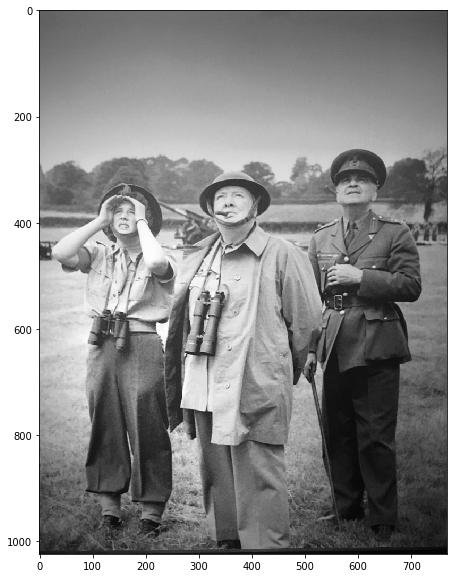

In [6]:
plt.imshow(img1, cmap='gray')
plt.show()

### Compute keypoints and descriptors

In [9]:
# sift output is list of 3-tupel. Each tuple t contains:
# t = (keypoints, descriptors, image with keypoints drawn into it)
sift_output = use_sift.compute_bundle(model, image_paths)

image:  ../data/v_churchill/1.ppm  img:  [[ 95  98  99 ...  86  84  82]
 [ 98 101 101 ...  83  81  80]
 [100 101 100 ...  81  80  79]
 ...
 [ 25  25  27 ...   7   6   6]
 [ 23  22  21 ...   7   6   5]
 [ 21  17  15 ...   7   6   5]]
image:  ../data/v_churchill/4.ppm  img:  [[106 106 106 ... 136 135 135]
 [106 106 106 ... 137 135 134]
 [105 105 105 ... 138 136 134]
 ...
 [ 23  24  25 ... 110 112 112]
 [ 22  23  25 ... 107 108 108]
 [ 22  23  24 ... 104 103 102]]


In [17]:
kp1, desc1, img1_kp = sift_output[0]
kp2, desc2, img2_kp = sift_output[1]

#### Show keypoints in first image

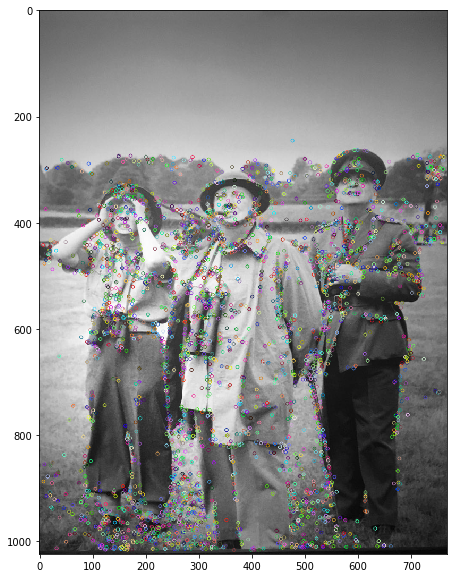

In [11]:
plt.imshow(sift_output[0][2])
plt.show()

#### Create Matcher and find matching descriptors

In [12]:
bf = cv2.BFMatcher(cv2.NORM_L2)

In [14]:
matches = bf.knnMatch(sift_output[0][1], sift_output[1][1], k=2)

In [18]:
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

In [19]:
img_matches = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, 0, flags=2)

error: OpenCV(3.4.2) /io/opencv/modules/features2d/src/draw.cpp:55: error: (-215:Assertion failed) !img.empty() in function '_drawKeypoint'
